## Visualize Data, Discard Incomplete Entries, Reshaping, and Saving
Edited from:
https://www.kaggle.com/code/chetankumar2404/starter-life-expectancy-who-414bacc2-2.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
print(os.listdir('../input'))

['Life Expectancy Data.csv']


In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.savefig('Cmat_LE_data.pdf', bbox_inches = 'tight') 
    plt.show()


In [4]:
df1 = pd.read_csv('../input/Life Expectancy Data.csv', delimiter=',')
df1.dataframeName = 'Life Expectancy Data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2938 rows and 22 columns


In [5]:
df1.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Correlation matrix:

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


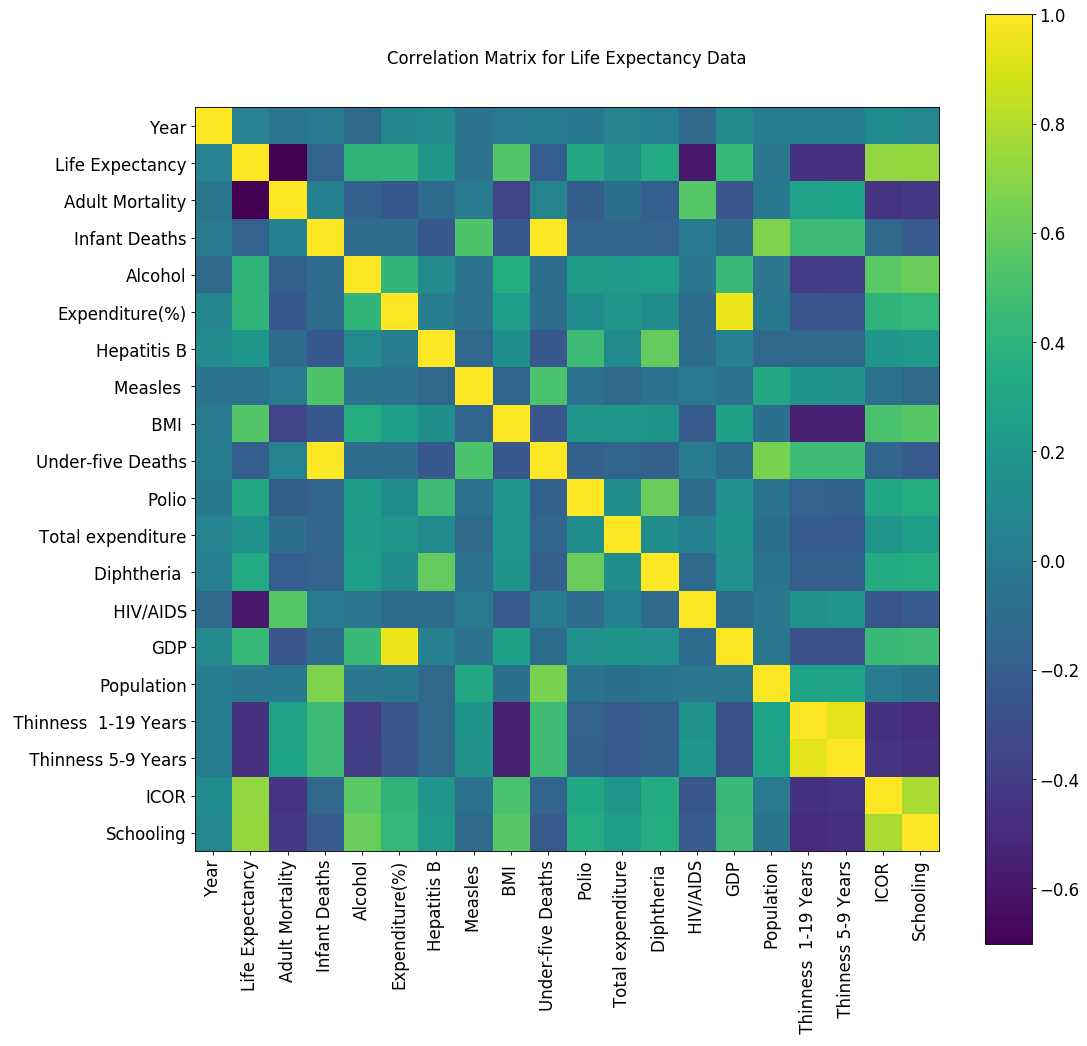

In [6]:
df2 = df1.dropna(how='any',axis=0) 
df2.dataframeName = 'Life Expectancy Data'
plt.rcParams["figure.dpi"] = 800
plt.rcParams.update({'font.size': 15})
df2.rename(columns = {'Income composition of resources':'ICOR', 'percentage expenditure':'Expenditure(%)','Life expectancy ':'Life Expectancy','infant deaths':'Infant Deaths','under-five deaths ':'Under-five Deaths',' thinness  1-19 years':' Thinness  1-19 Years',' thinness 5-9 years':' Thinness 5-9 Years','under-five deaths':'Under-five Deaths'}, inplace = True)
plotCorrelationMatrix(df2, 15) 

In [7]:
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1649 rows and 22 columns


### Selecting Columns Containing Numeric Values

### Life Expectancy is the Last Column 

In [8]:
columns_titles = ['Year','Adult Mortality','Infant Deaths','Alcohol','Expenditure(%)', 'Hepatitis B','Measles ',' BMI ','Under-five Deaths','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' Thinness  1-19 Years',' Thinness 5-9 Years', 'ICOR','Schooling', 'Life Expectancy']
df3=df2.reindex(columns=columns_titles)
df3.head(5)

,Year,Adult Mortality,Infant Deaths,Alcohol,Expenditure(%),Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,ICOR,Schooling,Life Expectancy
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [9]:
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')
df3.to_csv('Life_expectancy_last_column.csv') 

There are 1649 rows and 20 columns
